In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Testing a CNN on MNIST

### Imports required

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Have a look at the data and prepare it.

In [3]:
X = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X.shape

(42000, 785)

In [4]:
X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = X['label']

In [6]:
X.drop(['label'], axis=1, inplace=True)

In [7]:
# normalise the data by dividing by the max
X /=255

In [8]:
# convert X to an array
X = np.array(X)
# reshape to be [samples][width][height][channels]
Xr = X.reshape(X.shape[0], 28, 28, 1)

# normalise the data divide by the highest value 
# Xr /= 255 works in jupyter but not here? moved above

In [9]:
Xr.shape

(42000, 28, 28, 1)

In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y = to_categorical(y, num_classes)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(Xr, y, test_size=0.1, random_state=42, shuffle=True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 9s 247us/step - loss: 0.2710 - acc: 0.9142 - val_loss: 0.1009 - val_acc: 0.9712
Epoch 2/50
37800/37800 [==============================] - 4s 98us/step - loss: 0.1134 - acc: 0.9654 - val_loss: 0.0716 - val_acc: 0.9810
Epoch 3/50
37800/37800 [==============================] - 4s 103us/step - loss: 0.0908 - acc: 0.9747 - val_loss: 0.0686 - val_acc: 0.9814
Epoch 4/50
37800/37800 [==============================] - 4s 99us/step - loss: 0.0798 - acc: 0.9773 - val_loss: 0.0743 - val_acc: 0.9807
Epoch 5/50
37800/37800 [==============================] - 4s 110us/step - loss: 0.0716 - acc: 0.9788 - val_loss: 0.0512 - val_acc: 0.9855
Epoch 6/50
37800/37800 [==============================] - 4s 104us/step - loss: 0.0667 - acc: 0.9812 - val_loss: 0.0728 - val_acc: 0.9807
Epoch 7/50
37800/37800 [==============================] - 4s 97us/step - loss: 0.0545 - acc: 0.9842 - val_loss: 0.0798 - val_

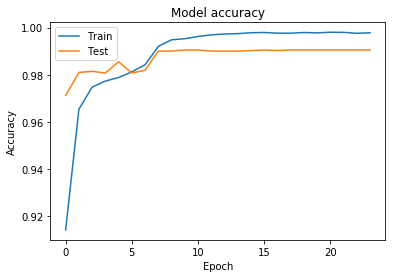

In [12]:
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, mode='max' )

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)

model = Sequential()

model.add(Conv2D(64, input_shape=(28, 28, 1) , kernel_size=(7,7), activation='elu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(300, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Train the model
model_his = model.fit(X_train, y_train, 
                      batch_size=50,
                      epochs=50, 
                      callbacks=[es, red_lr],
                      validation_data=(X_val, y_val) 
                      )

# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(model_his.history['acc'])
plt.plot(model_his.history['val_acc'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
# the highest accuracy score for the adding another hidden layer
print('\nThe highest test score', max(model_his.history['val_acc']).round(3))
plt.show()

In [13]:
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test.shape

(28000, 784)

In [14]:
# normalise the data by dividing by the max
X_test /=255
# convert X to an array
X_test = np.array(X_test)
# reshape to be [samples][width][height][channels]
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



In [15]:
#Train the model
model.fit(Xr, y, 
          batch_size=50,
          epochs=25, 
          callbacks=[red_lr] ) # need to shedule the learning rate reduction

preds = model.predict(X_test)

Epoch 1/25
42000/42000 [==============================] - 6s 133us/step - loss: 0.0113 - acc: 0.9970
Epoch 2/25
 1400/42000 [>.............................] - ETA: 4s - loss: 0.0099 - acc: 0.9971

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 5s 122us/step - loss: 0.0116 - acc: 0.9968
Epoch 3/25
42000/42000 [==============================] - 6s 136us/step - loss: 0.0118 - acc: 0.9966
Epoch 4/25
42000/42000 [==============================] - 5s 118us/step - loss: 0.0116 - acc: 0.9969
Epoch 5/25
42000/42000 [==============================] - 5s 124us/step - loss: 0.0118 - acc: 0.9971
Epoch 6/25
42000/42000 [==============================] - 5s 124us/step - loss: 0.0118 - acc: 0.9969
Epoch 7/25
42000/42000 [==============================] - 5s 129us/step - loss: 0.0115 - acc: 0.9969
Epoch 8/25
42000/42000 [==============================] - 5s 120us/step - loss: 0.0106 - acc: 0.9970
Epoch 9/25
42000/42000 [==============================] - 6s 134us/step - loss: 0.0115 - acc: 0.9970
Epoch 10/25
42000/42000 [==============================] - 5s 121us/step - loss: 0.0113 - acc: 0.9968
Epoch 11/25
42000/42000 [==============================] - 6s 133us/step - loss: 0.0115 - acc: 0.9968

In [16]:
preds[0]

array([1.2039341e-11, 3.9459292e-15, 1.0000000e+00, 8.3248315e-09,
       1.0629854e-14, 1.4026874e-12, 4.9938559e-10, 8.5042418e-09,
       3.8083082e-11, 8.6878279e-14], dtype=float32)

In [17]:
# convert back from a categorical array to an array of the digits predicted and expected
num_preds = np.argmax(preds, axis=1)

In [18]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [19]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [20]:
sub['Label'] = num_preds

In [21]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [22]:
sub.to_csv('./sub2.csv', index=False)